# Portfolio Optimization - Data Exploration

This notebook explores the initial data collection and portfolio optimization implementation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from portfolio_optimization.data import DataCollector
from portfolio_optimization.optimization import PortfolioOptimizer

# Set up plotting style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = [12, 6]  # Larger default figure size
plt.rcParams['axes.grid'] = True          # Always show grid
plt.rcParams['axes.spines.top'] = False   # Remove top spine
plt.rcParams['axes.spines.right'] = False # Remove right spine
sns.set_palette('husl')                   # Set color palette

## 1. Data Collection and Preprocessing

In [2]:
# Initialize data collector
collector = DataCollector()

# Collect and process data
data = collector.process_data()
prices = data['prices']
returns = data['returns']['daily']

print(f"Data shape: {returns.shape}")
print(f"\nFirst few rows of returns:")
returns.head()

Successfully fetched data for AAPL
Successfully fetched data for MSFT
Successfully fetched data for GOOGL
Successfully fetched data for AMZN
Successfully fetched data for META
Successfully fetched data for AGG
Successfully fetched data for DBC
Successfully fetched data for UUP
Data shape: (2922, 8)

First few rows of returns:


,AAPL,MSFT,GOOGL,AMZN,META,AGG,DBC,UUP
Date,,,,,,,,
2012-05-21,0.058260,0.016399,0.022835,0.019921,-0.109861,-0.000180,0.013323,-0.003117
2012-05-22,-0.007679,0.000336,-0.021674,-0.012746,-0.089039,-0.002433,-0.014275,0.010272
2012-05-23,0.024400,-0.021842,0.014414,0.009056,0.032258,0.001174,-0.011052,0.003537
2012-05-24,-0.009184,-0.001374,-0.009517,-0.009389,0.032188,-0.000812,0.000385,0.003965
2012-05-25,-0.005360,-0.000344,-0.020094,-0.010918,-0.033909,0.001535,0.003467,0.001316


### Data Quality Checks

In [3]:
# Check for missing values
print("Missing values:")
print(returns.isnull().sum())

# Basic statistics
print("\nBasic statistics:")
returns.describe()

Missing values:
AAPL     0
MSFT     0
GOOGL    0
AMZN     0
META     0
AGG      0
DBC      0
UUP      0
dtype: int64

Basic statistics:


,AAPL,MSFT,GOOGL,AMZN,META,AGG,DBC,UUP
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,0.001011,0.001089,0.000909,0.001116,0.001082,0.000065,0.000026,0.000109
std,0.017896,0.016751,0.017078,0.020377,0.025280,0.003072,0.010764,0.004496
min,-0.128647,-0.147390,-0.116342,-0.140494,-0.263901,-0.040011,-0.079444,-0.032070
25%,-0.007521,-0.006784,-0.007092,-0.008733,-0.010045,-0.001307,-0.005684,-0.002456
50%,0.000889,0.000734,0.000784,0.000935,0.000999,0.000178,0.000625,0.000000
75%,0.010317,0.009481,0.009239,0.011422,0.012825,0.001502,0.005959,0.002729
max,0.119808,0.142169,0.162584,0.141311,0.296115,0.023721,0.047990,0.037821


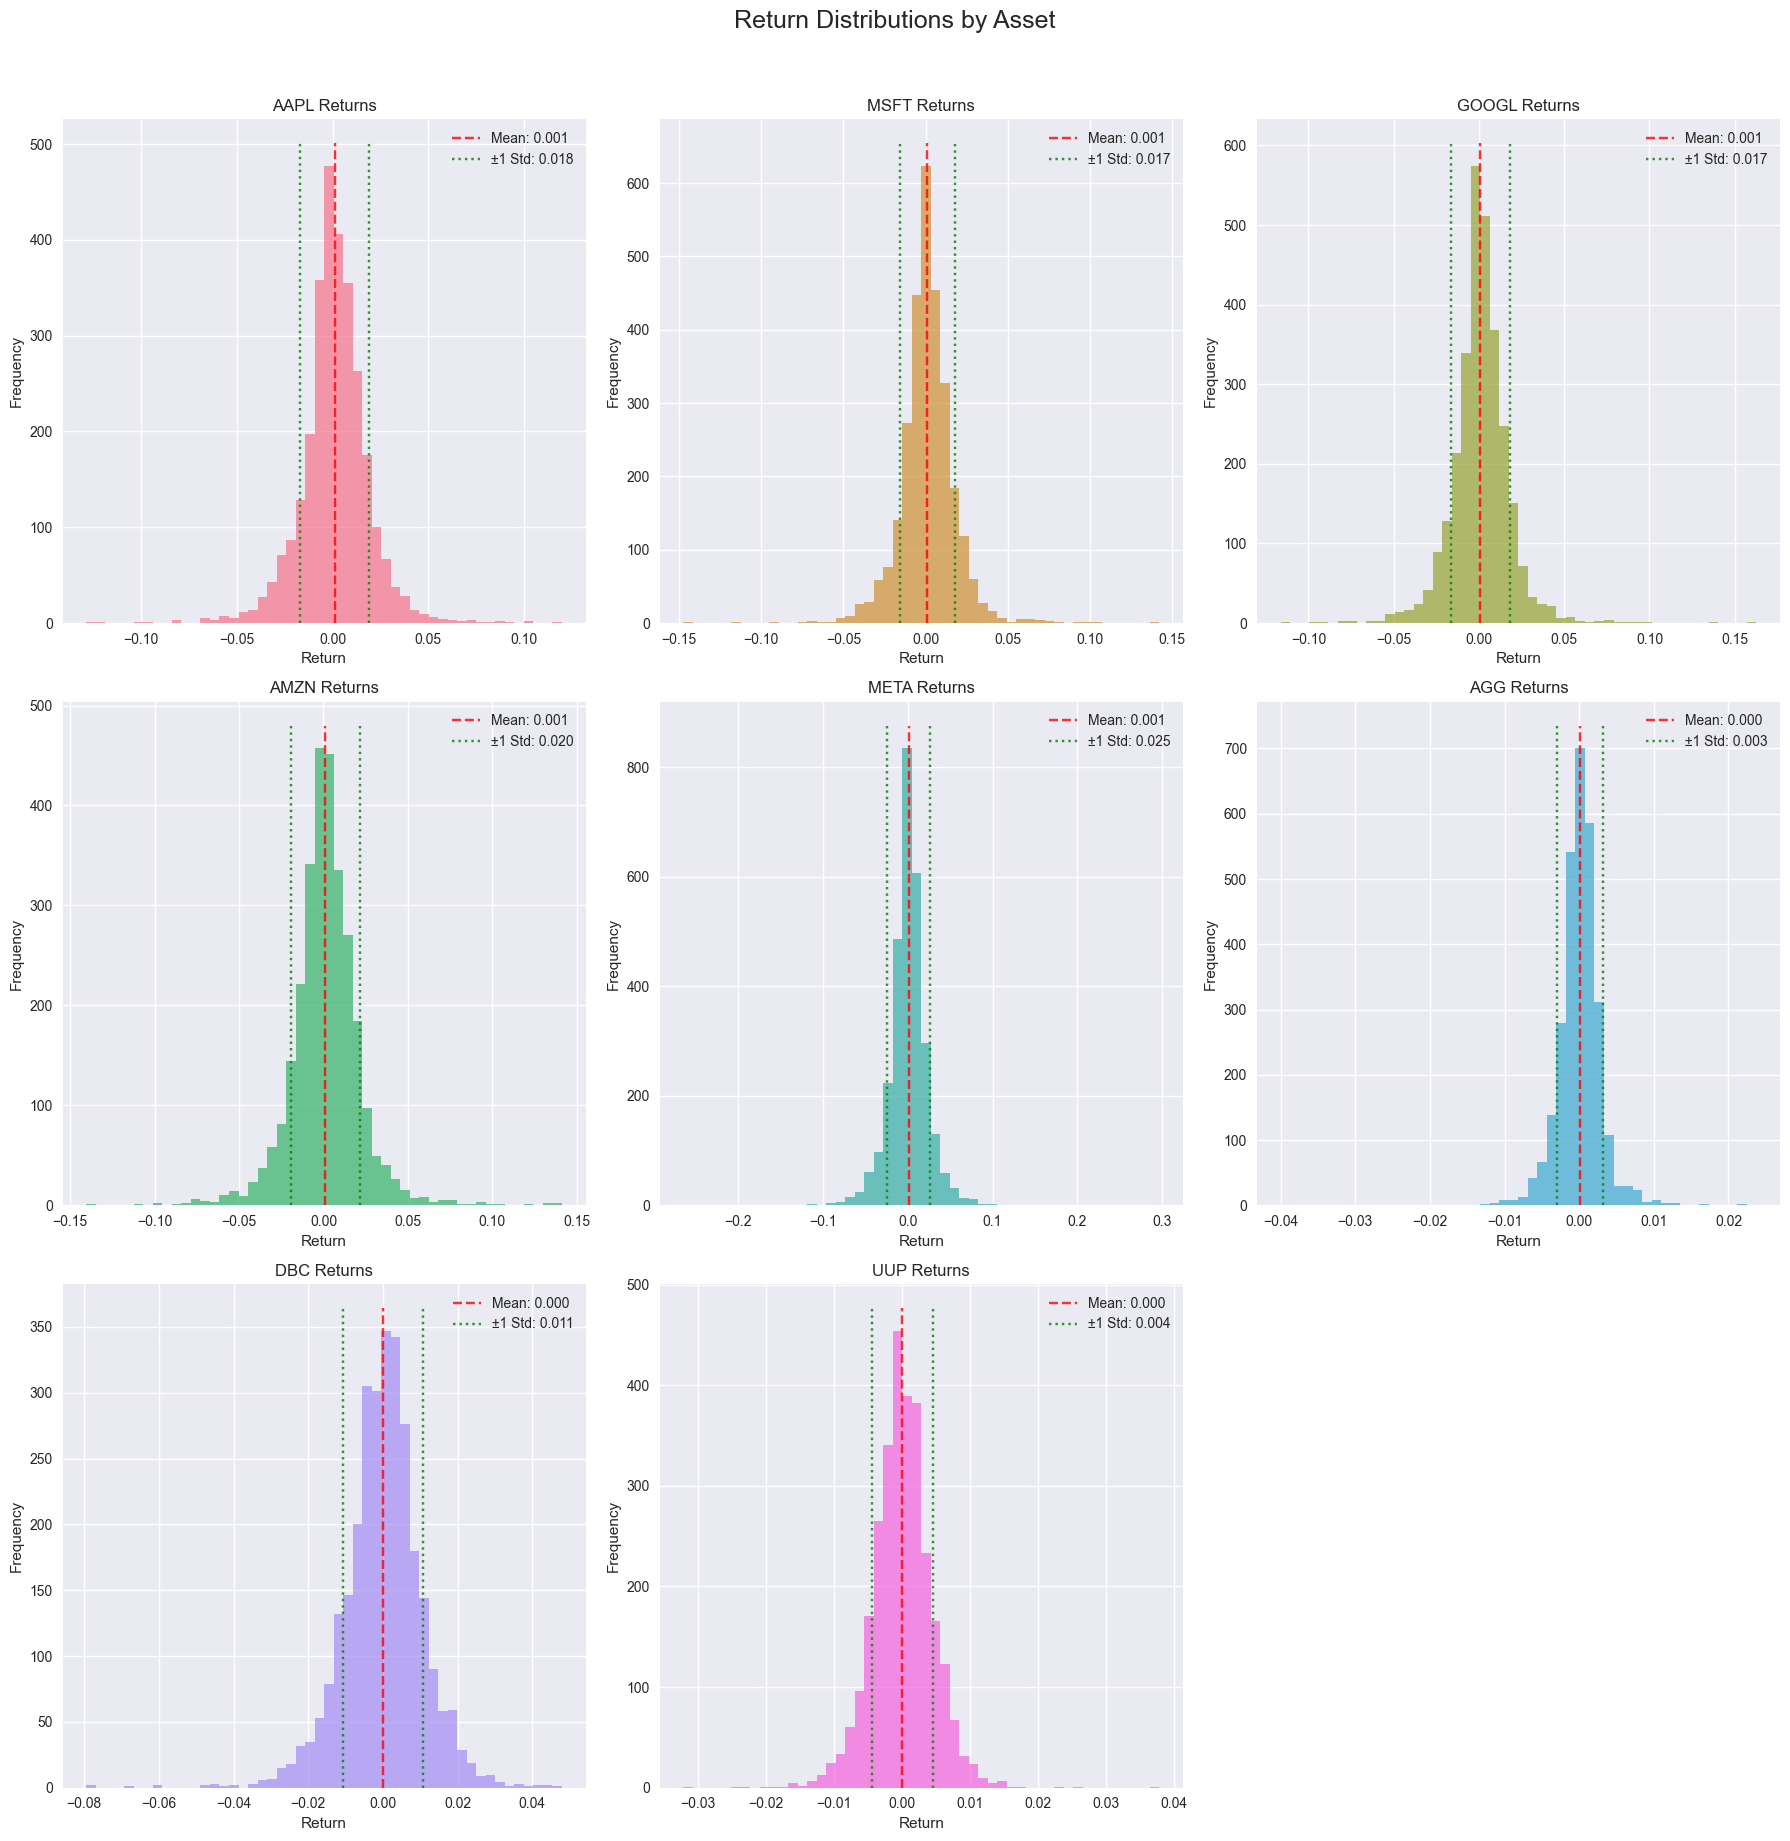

In [4]:
# Plot return distributions
n_assets = len(returns.columns)
n_rows = int(np.ceil(n_assets/3))
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6*n_rows))
axes = axes.ravel()

# Create color palette with enough colors
colors = sns.color_palette('husl', n_colors=n_assets)

# Plot histograms for each asset
for i, (col, ax) in enumerate(zip(returns.columns, axes[:n_assets])):
    returns[col].hist(bins=50, ax=ax, alpha=0.7, color=colors[i])
    ax.set_title(f'{col} Returns')
    ax.set_xlabel('Return')
    ax.set_ylabel('Frequency')
    
    # Add mean and std dev lines
    mean = returns[col].mean()
    std = returns[col].std()
    ylim = ax.get_ylim()
    ax.vlines(mean, *ylim, color='red', linestyles='--', alpha=0.8, label=f'Mean: {mean:.3f}')
    ax.vlines([mean-std, mean+std], *ylim, color='green', linestyles=':', alpha=0.8, label=f'±1 Std: {std:.3f}')
    ax.legend(fontsize=10)

# Remove empty subplots
for ax in axes[n_assets:]:
    fig.delaxes(ax)

plt.suptitle('Return Distributions by Asset', y=1.02, fontsize=18)
plt.tight_layout()
plt.show()

### Correlation Analysis

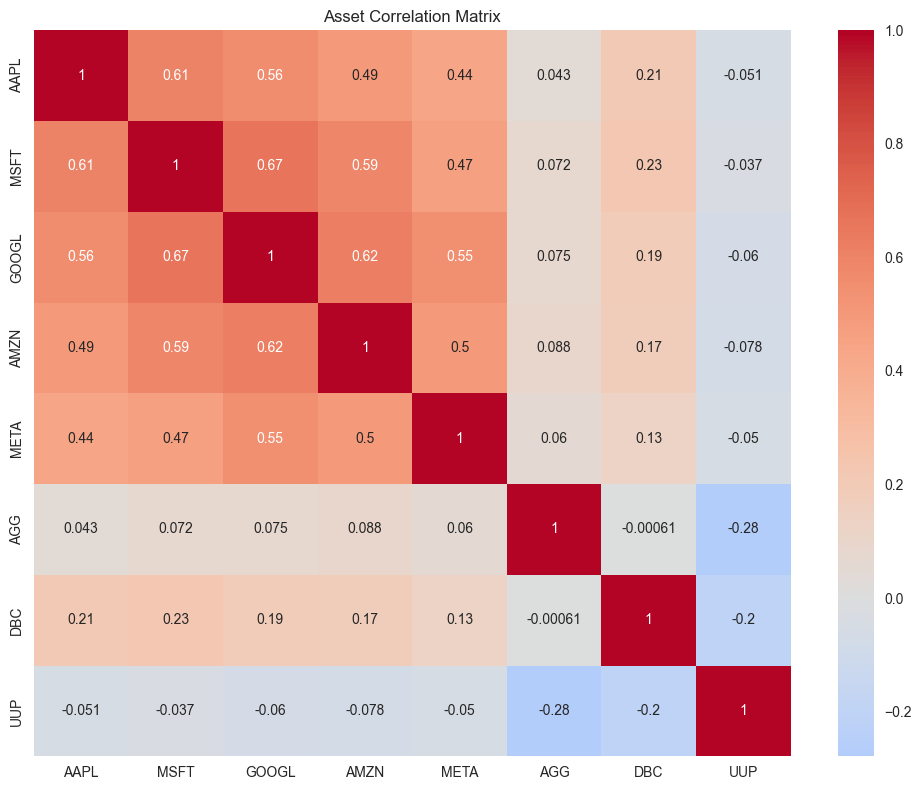

In [5]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Asset Correlation Matrix')
plt.tight_layout()
plt.show()

## 2. Portfolio Optimization


Optimizing portfolio for objective: sharpe

Input Statistics:
Mean Returns (annualized):
AAPL     0.254741
MSFT     0.274318
GOOGL    0.228974
AMZN     0.281125
META     0.272632
AGG      0.016456
DBC      0.006658
UUP      0.027519

Volatilities (annualized):
AAPL     0.284094
MSFT     0.265919
GOOGL    0.271109
AMZN     0.323473
META     0.401306
AGG      0.048764
DBC      0.170869
UUP      0.071373

Constraints:
Number of assets: 8
Min position: 0.00%
Max position: 20.00%

Initial weights:
AAPL: 12.50%
MSFT: 12.50%
GOOGL: 12.50%
AMZN: 12.50%
META: 12.50%
AGG: 12.50%
DBC: 12.50%
UUP: 12.50%

Trying optimization with method SLSQP, attempt 1
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.2123562589108638
            Iterations: 9
            Function evaluations: 84
            Gradient evaluations: 9
Found better solution with metric: -1.212356

Trying optimization with method SLSQP, attempt 2
Optimization terminated successfully    (Exit

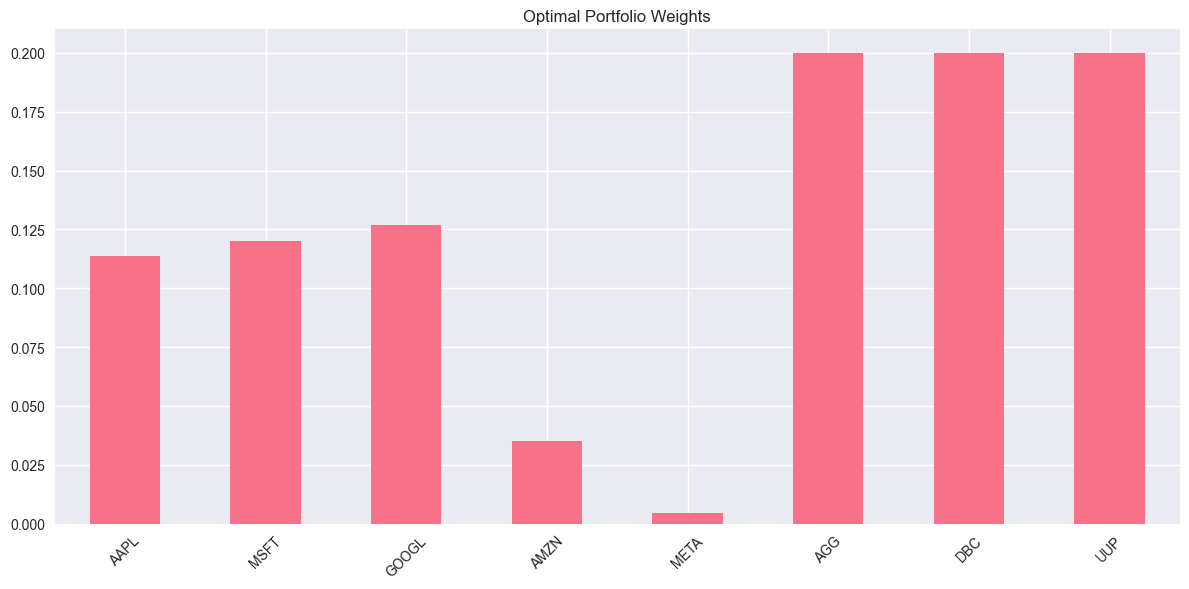

In [6]:
# Initialize optimizer
optimizer = PortfolioOptimizer()

# Optimize portfolio
result = optimizer.optimize_portfolio(returns)

print("Optimal Portfolio:")
print(f"Sharpe Ratio: {result['sharpe_ratio']:.2f}")
print(f"Annual Return: {result['return']:.2%}")
print(f"Annual Volatility: {result['volatility']:.2%}")

# Plot weights
plt.figure(figsize=(12, 6))
pd.Series(result['weights']).plot(kind='bar')
plt.title('Optimal Portfolio Weights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Efficient Frontier

In [7]:
# Generate efficient frontier
ef = optimizer.generate_efficient_frontier(returns, n_points=50, verbose=False)


Found 3 similar points in the efficient frontier
Keeping 47 unique points


In [8]:
ef

,return,volatility,sharpe_ratio,weights,return_diff,volatility_diff
0,0.161984,0.139083,0.877058,"{'AAPL': 0.1718998549207427, 'MSFT': 0.1999999...",NaN,NaN
1,0.162277,0.139309,0.877739,"{'AAPL': 0.1724158970825456, 'MSFT': 0.1999999...",0.000293,0.000226
3,0.162623,0.139576,0.878535,"{'AAPL': 0.1730238996125264, 'MSFT': 0.2, 'GOO...",0.000346,0.000267
5,0.163368,0.140154,0.880234,"{'AAPL': 0.17433119953032486, 'MSFT': 0.2, 'GO...",0.000746,0.000578
6,0.164269,0.140855,0.882251,"{'AAPL': 0.17591767635483038, 'MSFT': 0.199999...",0.000901,0.000701
7,0.164388,0.140947,0.882513,"{'AAPL': 0.1761259577370647, 'MSFT': 0.2, 'GOO...",0.000118,0.000092
8,0.164596,0.141110,0.882974,"{'AAPL': 0.1764932950381148, 'MSFT': 0.2, 'GOO...",0.000209,0.000163
9,0.164737,0.141220,0.883284,"{'AAPL': 0.17674142391984507, 'MSFT': 0.2, 'GO...",0.000141,0.000110
10,0.164886,0.141336,0.883611,"{'AAPL': 0.17700366800754536, 'MSFT': 0.2, 'GO...",0.000149,0.000116
11,0.165602,0.141896,0.885165,"{'AAPL': 0.17826207193934882, 'MSFT': 0.2, 'GO...",0.000715,0.000560


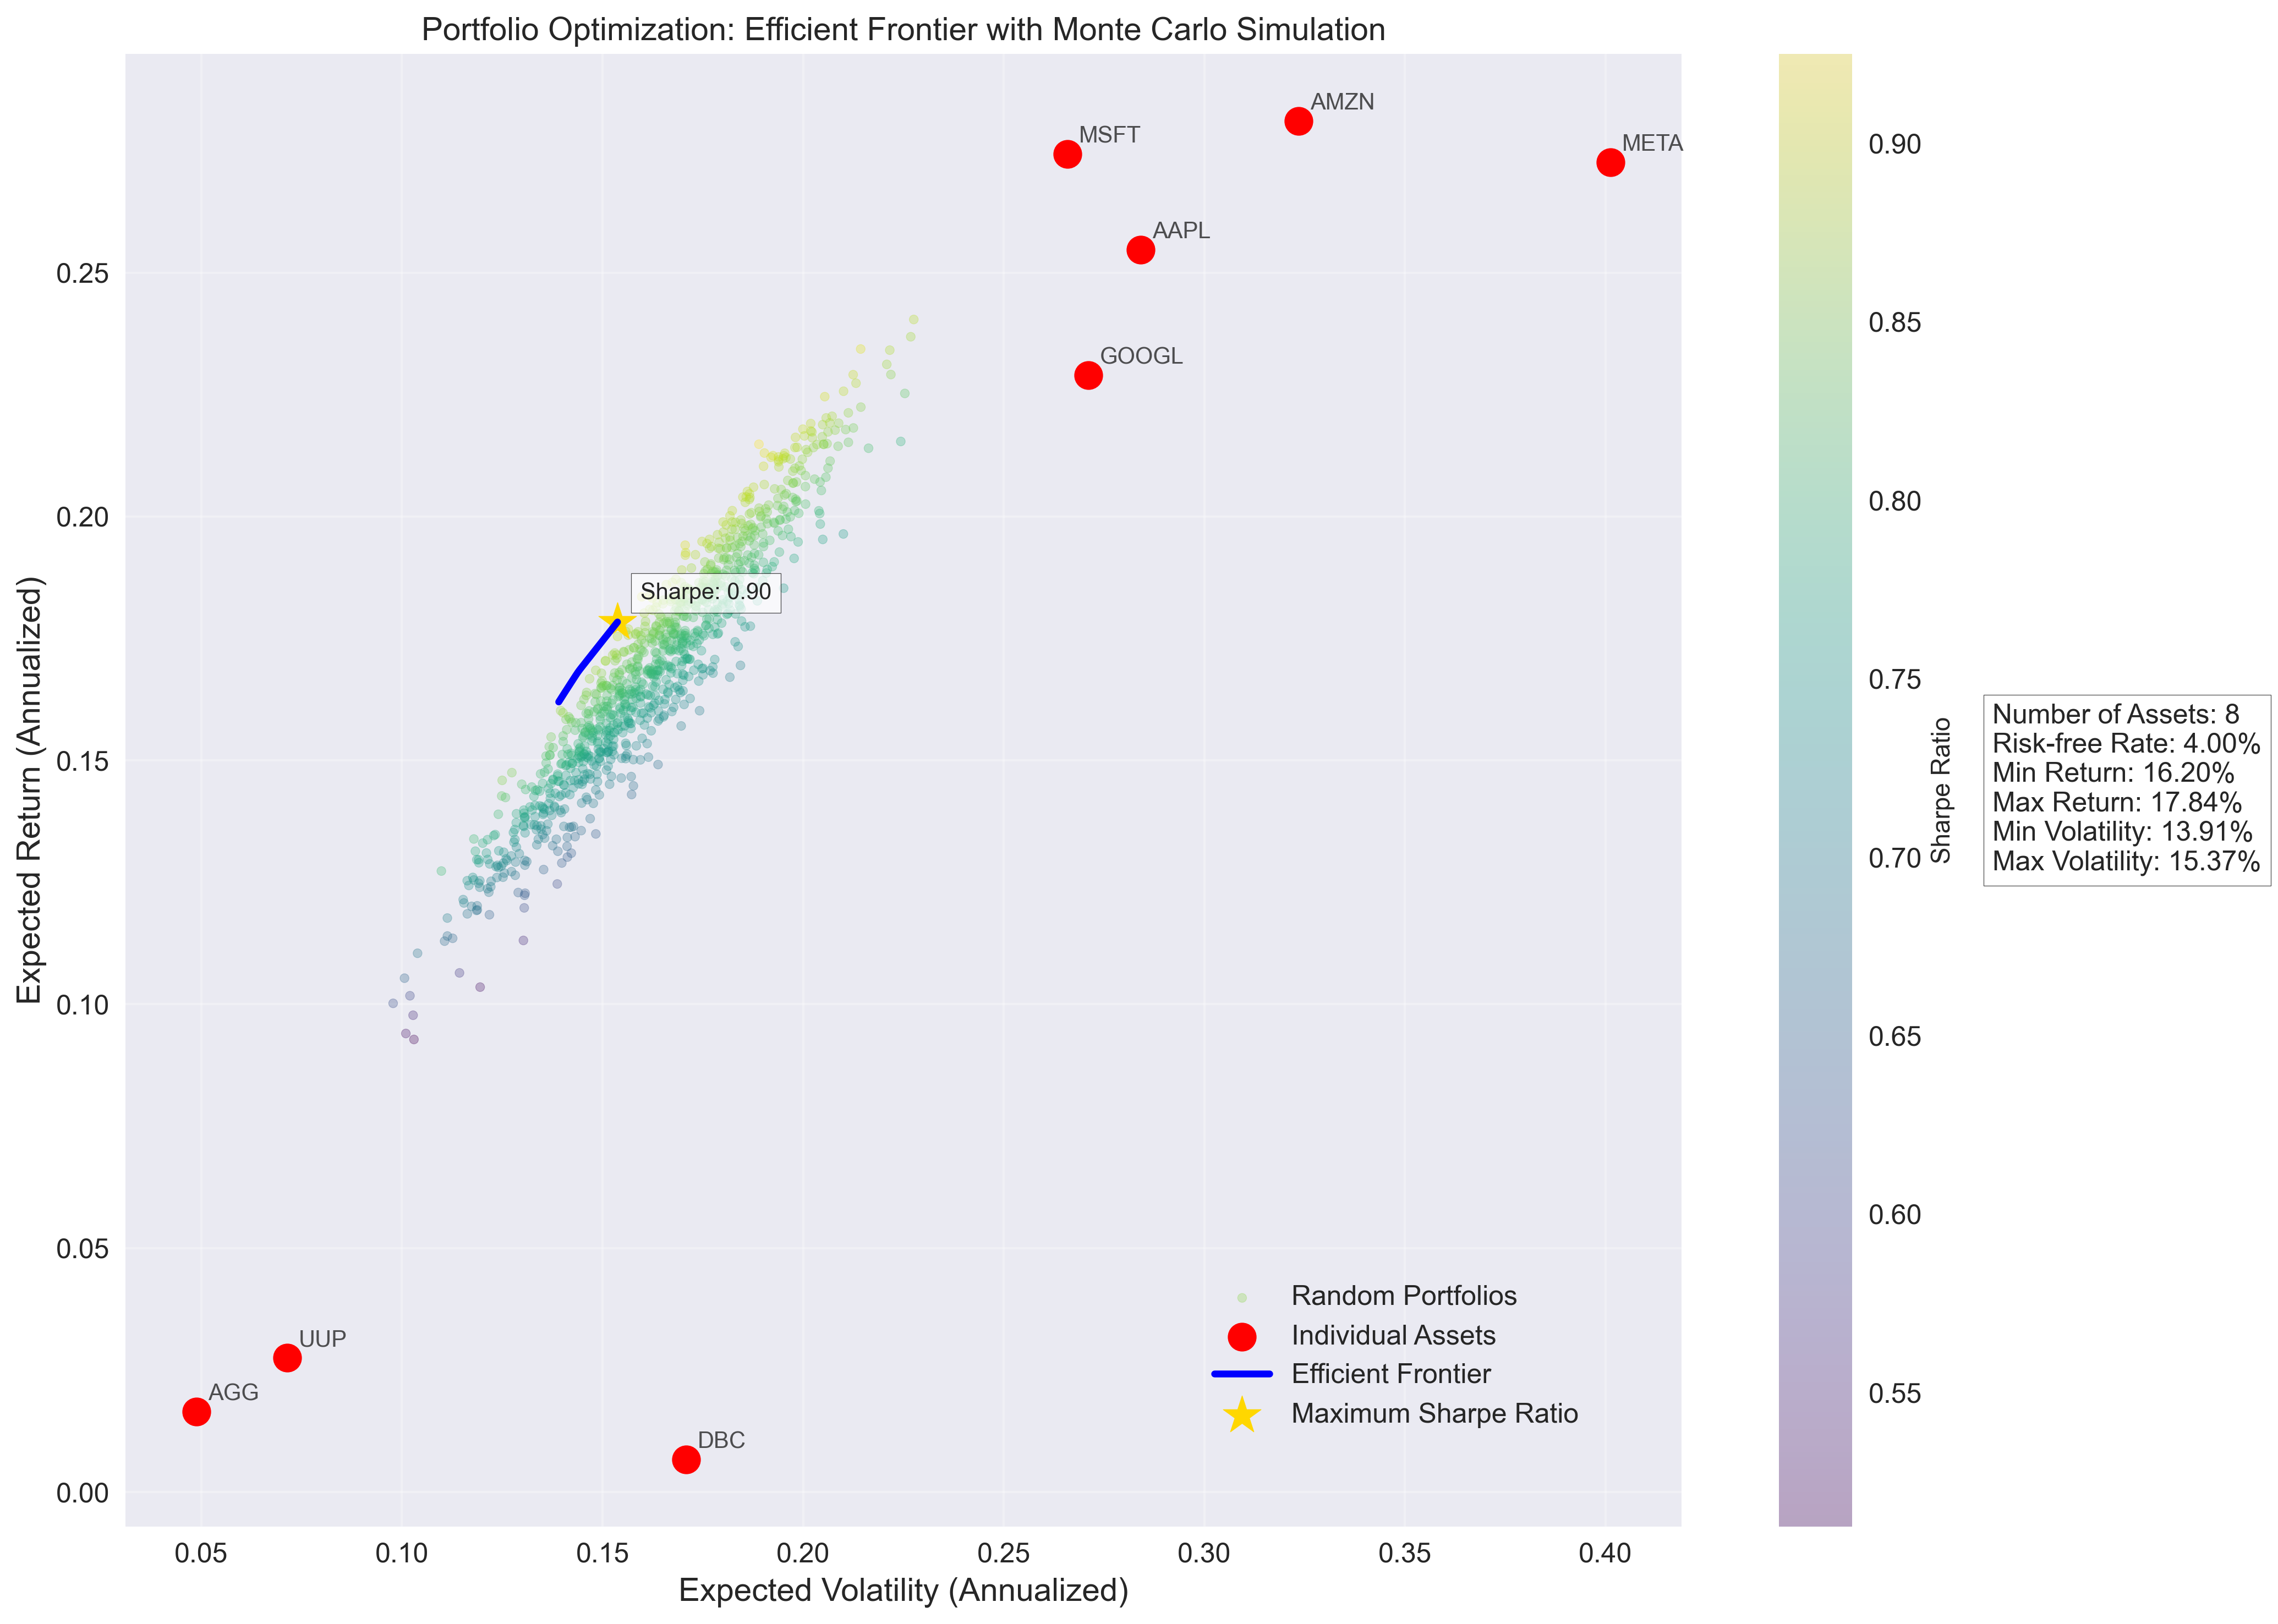

In [9]:
# Or plot separately if needed
optimizer.plot_efficient_frontier(ef, show_sharpe=True, show_assets=True, returns=returns)

<Figure size 1200x600 with 0 Axes>

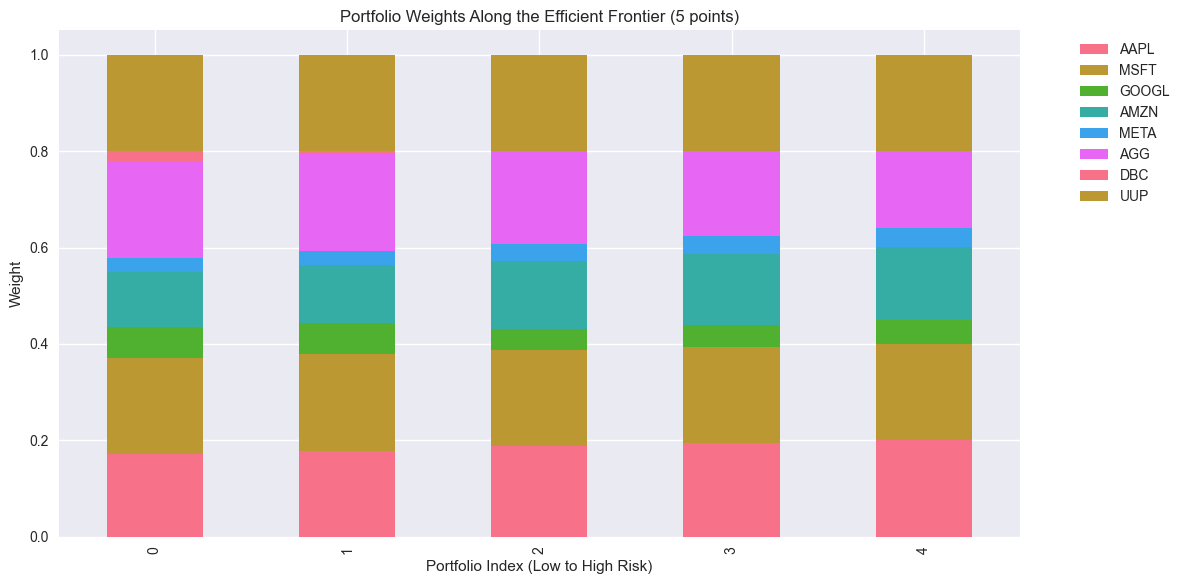


Selected portfolios metrics:

Portfolio 1:
Return: 16.20%
Volatility: 13.91%
Sharpe Ratio: 0.88

Weights:
AAPL: 17.19%
MSFT: 20.00%
GOOGL: 6.25%
AMZN: 11.52%
META: 2.82%
AGG: 20.00%
DBC: 2.22%
UUP: 20.00%

Portfolio 2:
Return: 16.60%
Volatility: 14.22%
Sharpe Ratio: 0.89

Weights:
AAPL: 17.90%
MSFT: 20.00%
GOOGL: 6.48%
AMZN: 12.05%
META: 2.94%
AGG: 20.00%
DBC: 0.63%
UUP: 20.00%

Portfolio 3:
Return: 17.07%
Volatility: 14.64%
Sharpe Ratio: 0.89

Weights:
AAPL: 18.79%
MSFT: 20.00%
GOOGL: 4.29%
AMZN: 14.12%
META: 3.61%
AGG: 19.20%
DBC: 0.00%
UUP: 20.00%

Portfolio 4:
Return: 17.45%
Volatility: 15.00%
Sharpe Ratio: 0.90

Weights:
AAPL: 19.43%
MSFT: 20.00%
GOOGL: 4.58%
AMZN: 14.61%
META: 3.73%
AGG: 17.64%
DBC: 0.00%
UUP: 20.00%

Portfolio 5:
Return: 17.84%
Volatility: 15.37%
Sharpe Ratio: 0.90

Weights:
AAPL: 20.00%
MSFT: 20.00%
GOOGL: 4.93%
AMZN: 15.15%
META: 3.87%
AGG: 16.06%
DBC: 0.00%
UUP: 20.00%


In [10]:
optimizer.plot_portfolio_weights(ef, n_points=5)